<a href="https://colab.research.google.com/github/KwonDoRyoung/AdvancedBasicEducationProgram/blob/main/abep11_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
BATCH_SIZE = 32
EPOCHS = 5

In [ ]:
''' 1. 딥러닝 모델을 설계할 때 활용하는 장비 확인 '''
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 1.10.0+cu111  Device: cpu


In [ ]:
# 마운트를 통해 google drive에 접근
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/cifar-10_train.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/cifar-10_test.csv'

In [ ]:
# Dataset 생성코드
class CustomDataset(Dataset):
    def __init__(self,path):
        data = pd.read_csv(path)
        X = data.drop(['label'],axis=1)/255     # 라벨과 데이터중 데이터 부분만 빼내는 작업
        X = X.values.reshape(-1,3,32,32)
        X = torch.FloatTensor(X)                # 데이터 Float로 변환
        y = data['label']                       # 라벨과 데이터중 라벨 부분만 빼내는 작업
        y = y.values.reshape(-1)                #
        y = torch.LongTensor(y)                 # LongTensor로 변환
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)                      # 총길이의 표현
    
    def __getitem__(self,idx):                  # 데이터가 idx 갯수만큼 존재(idx의 크기 = len)
        a = self.X[idx]
        b = self.y[idx]
        return a,b

In [ ]:
''' 2. Dataset & Dataloader 사용하여 Custom Dataset 만들기 '''
train_dataset = CustomDataset(train_path)
test_dataset = CustomDataset(test_path)
train_loader = DataLoader(dataset = train_dataset,
                          batch_size = BATCH_SIZE,
                          shuffle = True)
test_loader = DataLoader(dataset = test_dataset,
                         batch_size = BATCH_SIZE,
                         shuffle = False)

In [ ]:
''' 3. 데이터 확인하기(1) '''
for (image, label) in train_loader:
    print('image:', image.size(), 'type:', image.type())
    print('label:', label.size(), 'type:', label.type())
    break

image: torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
label: torch.Size([32]) type: torch.LongTensor


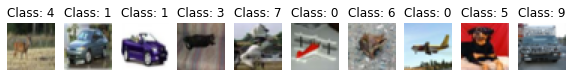

In [ ]:
''' 4. 데이터 확인하기 (2) '''
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(image[i], (1, 2, 0)))
    plt.title('Class: ' + str(label[i].item()))

In [ ]:
data = train_dataset
print(data[0])

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0